# 画像処理３：二次元デジタルフィルタ

二次元デジタルフィルタは、画像が入力されると、その画像のそれぞれの画素に対して何らかの輝度変換をかけて新しい画像を生成します。  
例えば、`ImageBinarization.ipynb`で演習した「閾値処理による画像の二値化（白黒化）」は、画像の各画素に対して、指定された定数（閾値）よりも高ければ白、低ければ黒とする手法でした。

しかし、各画素の値はその画素だけでなく、その画素を含む周辺の画素の値から計算して決めることもできます。   
（画像処理では、注目している画素の周辺の画素のことを「近傍」と呼びます。）   
このとき、その近傍の画素の値をそれぞれどの程度取るかをいろいろと変えることによって、様々な効果を実現することができます。

例えば
- 周辺の画素から満遍なく値を取る場合、平均値フィルタと呼ばれ、ボケた画像を生成します
- その画素と、周辺の画素の差を取る場合、ラプラシアンフィルタと呼ばれ、輪郭線を取り出したような画像になります

近傍の画素をどのように取っていくのかを決めるフィルタはkernelと呼ばれ、通常は3x3や5x5、7x7、11x11など、一片が奇数の画素からなる正方行列です。   
また、注目する画像を徐々に移動しながら、各画素に対し、カーネルを当てはめて値を計算していく処理を「**畳み込み（convolution)**」と呼びます。

**畳み込みは、Deep Learningによる画像処理の最も基本的な処理です。**   
(2012年に始めに考案されたDeep Learningによる物体認識モデルである`AlexNet`は、別名`Convolutional Neural Network (CNN)`と呼ばれます。）   
Deep LearningはConvolutionの繰り返しであると言っても過言ではありません。   
この機会に、Convlutionの概念をしっかり理解しておきましょう。



## 1. 原画像の読み込み

まずは現画像を読み込みます。   
入力画像をいろいろと変えて試してみましょう。

hight: 480 width:  320


True

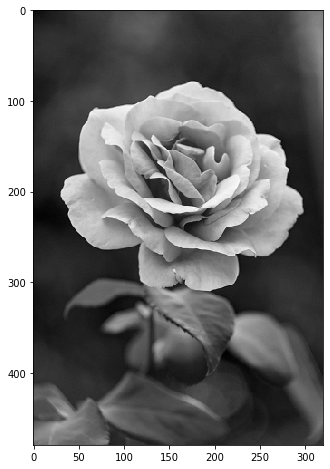

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# 原画像をいろいろと変えてみましょう
imgfile = 'img/flor-flower-garden-736230_mini.png'
#imgfile = 'img/action-active-activity-2091651_mini.jpg'
#imgfile = 'img/flowers-19830_640.jpg'

img_gray = cv2.cvtColor(cv2.imread(imgfile), cv2.COLOR_BGR2GRAY)
print('hight:', len(img_gray), 'width: ', len(img_gray[0]))

plt.figure(figsize=(6, 8))
plt.imshow(img_gray, 'gray')
cv2.imwrite('img/OriginalImage.jpg', img_gray)


## 2. 平均値フィルタ

画像の各画素について、その画素の値と、その周辺の画素の値の平均値でその画素の値を置き換えたものです。   
ボケた画像になります。

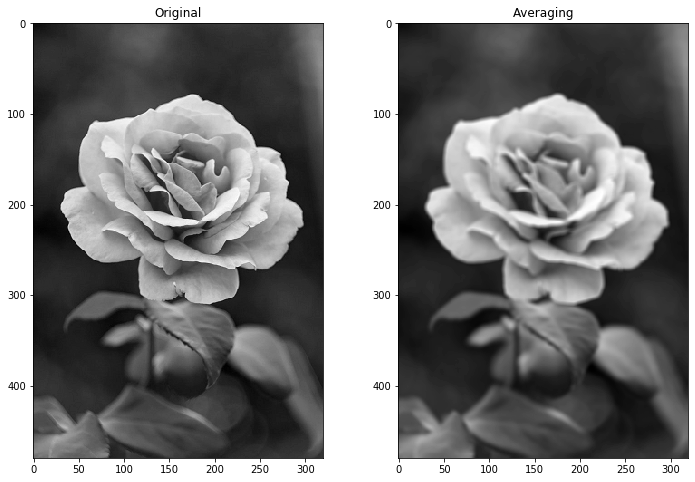

True

In [2]:
import numpy as np

# 平均値フィルタ（３ｘ３）その画素を中心に、その左右、上下、斜め上下の合計9個の画素の平均値で置き換える
kernel1 = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]], np.float32)

# 平均値フィルタ（５ｘ５）
kernel2 = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25]], np.float32)

#dst_img = cv2.filter2D(img_gray,-1,kernel1)# 平均値フィルタ（３ｘ３）
dst_img = cv2.filter2D(img_gray,-1,kernel2)# 平均値フィルタ（５ｘ５）

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(img_gray, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(dst_img, 'gray'),plt.title('Averaging')
plt.show()
cv2.imwrite('img/MeanImage.jpg', dst_img)


## 3. 鮮鋭化フィルタ

画像の各画素について、
- その画素の値と、その周辺の画素の値が違うとき、その画素の値を大きくする
- その画素の値と、その周辺の画素の値が同じ時、その画素の元の値をそのまま使う

ことで、
輪郭を際立たせ、鮮鋭にするフィルタです。
輪郭線を見比べてみてください。

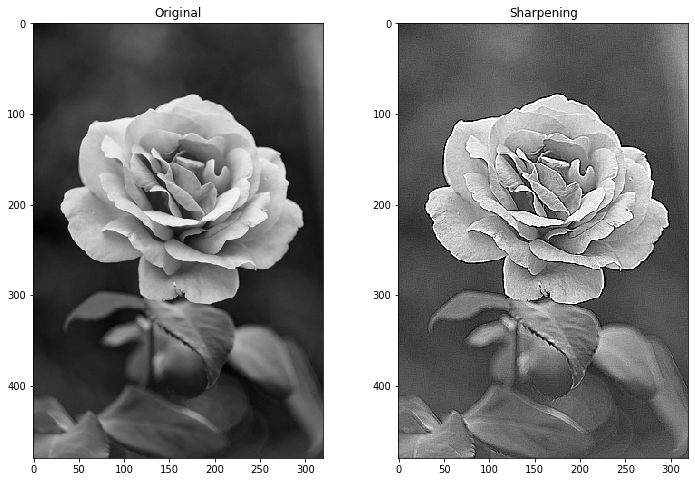

True

In [3]:
k = 5
kernel = np.array([[-k/8, -k/8, -k/8],
                   [-k/8,  1+k, -k/8],
                   [-k/8, -k/8, -k/8]], np.float32)

dst_img = cv2.filter2D(img_gray,-1,kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(img_gray, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(dst_img, 'gray'),plt.title('Sharpening')
plt.show()

cv2.imwrite('img/ShapeningImage.jpg', dst_img)


## 4. ラプラシアンフィルタ

画像の各画素について、
- その画素の値とその周辺の画素の値が違うとき、その画素の値を大きくする
- その画素の値とその周辺の画素の値が同じ時、その画素の値は0にする

とすることによって、周辺との輝度が違う輪郭線を取り出すフィルタです。

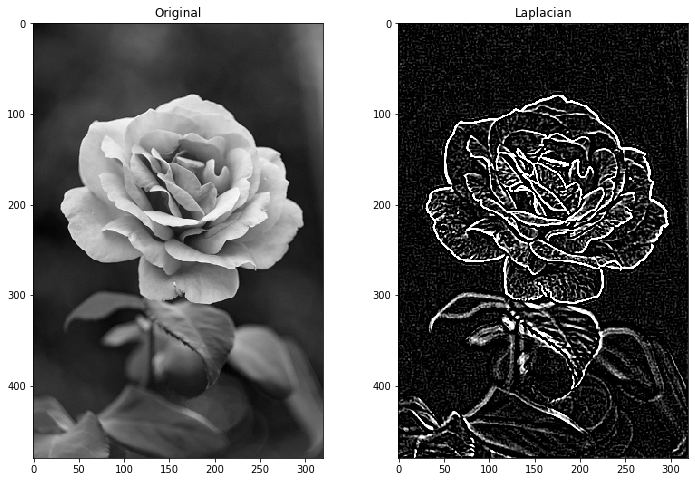

True

In [4]:
# ラプラシアン（３×３）
kernel1 = np.array([[-1,  -1, -1],
                   [-1, 8, -1],
                   [-1,  -1, -1]], np.float32)

# ラプラシアン（５ｘ５）
kernel2 = np.array([[-1, -3, -4, -3, -1],
                    [-3,  0,  6,  0, -3],
                    [-4,  6, 20,  6, -4],
                    [-3,  0,  6,  0, -3],
                    [-1, -3, -4, -3, -1]], np.float32)

#dst_img = cv2.filter2D(img_gray,-1,kernel1) # ラプラシアン（３ｘ３）
#dst_img2 = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5) # こちらでもいい

dst_img = cv2.filter2D(img_gray,-1,kernel2) # ラプラシアン（５ｘ５）
#dst_img2 = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5) # こちらでもいい

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(img_gray, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(dst_img, 'gray'),plt.title('Laplacian')
plt.show()

cv2.imwrite('img/LaplacianImage.jpg', dst_img)


## 5. 横ブレ・縦ブレフィルタ

画像の各画素について、その画素の値を、その画素と、その横方向に並ぶ画素の値の平均値で置き換えることによって、横ブレを作り出すフィルタです。   
縦ブレは同様に縦方向の画素の平均値で置き換えます。

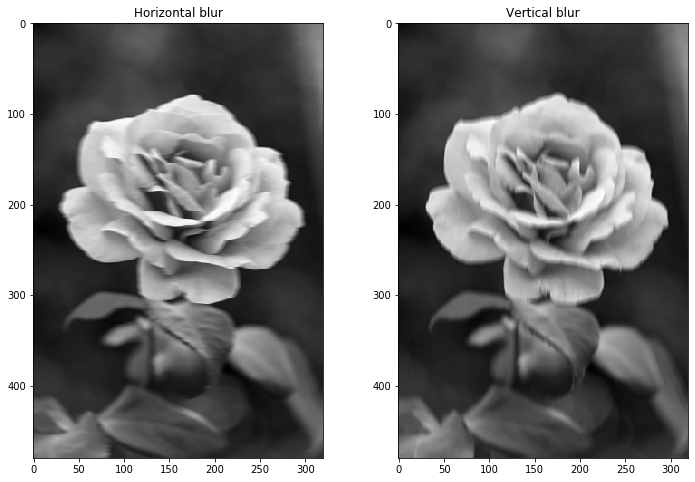

True

In [5]:
import numpy as np

# 横ブレフィルタ（７ｘ７）
kernel1 = np.array([[0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0],
                    [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
                    [0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0]], np.float32)
# 以下の式でも同じ
# kernel1 = np.array([[1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]], np.float32)

# 縦ブレフィルタ（７ｘ７）
kernel2 = np.array([[0, 0, 0, 1/7, 0, 0, 0],
                    [0, 0, 0, 1/7, 0, 0, 0],
                    [0, 0, 0, 1/7, 0, 0, 0],
                    [0, 0, 0, 1/7, 0, 0, 0],
                    [0, 0, 0, 1/7, 0, 0, 0],
                    [0, 0, 0, 1/7, 0, 0, 0],
                    [0, 0, 0, 1/7, 0, 0, 0]], np.float32)
# 以下の式でも同じ
# kernel2 = np.array([1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7], np.float32)

dst_img1 = cv2.filter2D(img_gray,-1,kernel1)# # 横ブレフィルタ（７ｘ７）
dst_img2 = cv2.filter2D(img_gray,-1,kernel2)# # 縦ブレフィルタ（７ｘ７）

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(dst_img1, 'gray'),plt.title('Horizontal blur')
plt.subplot(122),plt.imshow(dst_img2, 'gray'),plt.title('Vertical blur')
plt.show()

cv2.imwrite('img/Hhorizontal_blur.jpg', dst_img1)
cv2.imwrite('img/Vertical_blur.jpg', dst_img2)


## 6. ガウシアンフィルタ

画像の各画素について、その画素の値を一番多く取りますが、その周辺の画素の値も、その距離に応じて値を少しずつもらってくることで、なだらかなボケを作り出す手法です。   
カメラのレンズ調節で焦点があっていないことによって生じるピンボケは、ガウシアンフィルタで模倣することができます。   

ここで、ピンボケとは何かを考えてみましょう。   
ピントがぴったり合っていれば、ある画素の輝度値は、撮影対象の風景のうち、その画素に対応する領域のみから発せられる光によって決められます。   
しかしながらピントがずれていると、その領域だけでなく、その周辺の領域の光もその画素に到達してしまいます。   
ここで、周辺の領域の光がどの程度混ざってくるかは、対応する領域に近ければ近いほど多く、遠ければ遠いほど少ないと考えられます。   
つまり、対応する領域を中心とする距離に応じて減衰するということです。   
このとき、その減衰の仕方は[正規分布（ガウス分布）](https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83)でモデル化できます。

### 6.1 1次元のガウス分布

ガウス分布がどのようなものか見てみましょう。   
opencvの関数`getGaussianKernel`を使ってガウシアンフィルタを生成します。   
ガウス分布は平均$\mu$と標準偏差$\sigma$の二つの値をとり、以下の式で定義されます。

$$f_{1d}(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\exp \!\left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)\quad (x\in \mathbb {R} ) \tag{1} $$

画像のフィルタとして使用する場合、元の画像の全体の輝度に影響を与えいなよう、
全要素の値の総和が1になるよう平均値が調整されます
（もし総和が1を超えると、画像が全体的に明るくなってしまったり、表現可能な輝度の最大値を超える可能性があるためです）。   
よって、指定するのは標準偏差のみです。

ガウシアンフィルタの全要素の和： [1.]


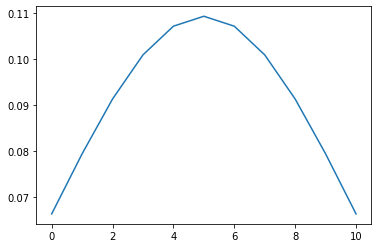

In [6]:
## dimension次元、標準偏差sigmaのガウス分布を生成します
dimension = 11
sigma = 5

gaussian_1d = cv2.getGaussianKernel(dimension, sigma)
plt.plot(gaussian_1d)
print('ガウシアンフィルタの全要素の和：', sum(gaussian_1d))

中央が最も高く、両端に行くにしたがって値が小さくなり、すべての要素（これは11次元のベクトルなので、11個の要素を）を足すと1になるようなガウス分布ができました。

### 6.2 2次元のガウス分布

先ほど生成したのは1次元のガウシアンフィルタです。   
2次元にするために、1次元のガウシアンフィルタ間の積をとります。  
これを式で表すと、

$$f(x,y)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2+(y-\mu)^2}{2\sigma^2})\quad (x, y\in \mathbb {R} )  \tag{2}$$

となります。

ガウシアンフィルタの全要素の和： 1.0


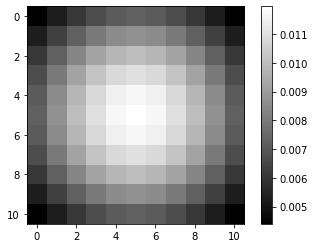

In [7]:
gaussian_2d = gaussian_1d * gaussian_1d.T
plt.imshow(gaussian_2d, 'gray')
plt.colorbar()
print('ガウシアンフィルタの全要素の和：', sum(sum(gaussian_2d)))


中央の値が最も大きく、そこから離れるにしたがって値が小さくなるようなフィルタができました。   
これを画像に畳み込みするとどうなるでしょうか？

原画像を$I$、生成される画像$I'$とします。   
生成される画像$I$の座標$(x, y)$の画素$I'(x, y)$は、原画像$I$の座標$(x, y)$の画素$I(x, y)$の値を最も大きく取り、   
さらにその周辺の座標$(x\pm a, y\pm b)$、ただし$ a, b = \{-5, -4, -3, -2, -1, 1, 2, 3, 4, 5\}$（ガウシアンフィルタのサイズが$11$の場合）の画素からも少しずつ値をとっていきます。   
このとき、その重みが上の式(2)にあるように、中心から離れるほど小さくなるというわけです。

### 6.3 画像に対するガウシアンフィルタの適用

それでは二次元ガウシアンフィルタを画像に畳み込んでみましょう。   
左の原画像に対し、右の画像はピンボケしたようになりましたか？   
ガウシアンフィルタの標準偏差$\sigma$を変えるとどうなるか、いろいろと試してみましょう。

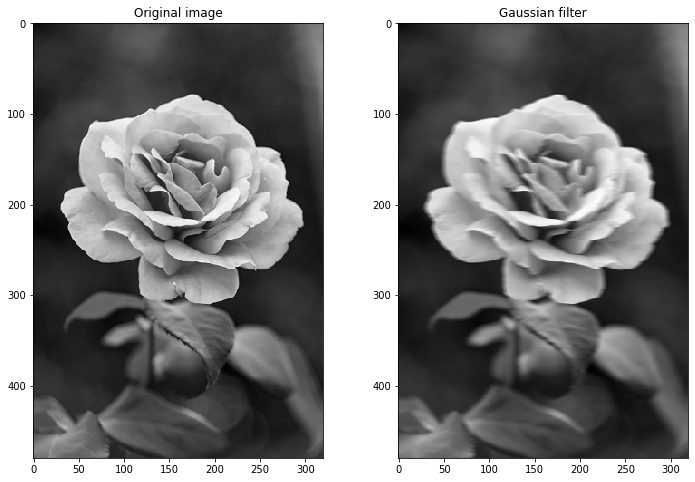

True

In [8]:
import numpy as np


dst_img = cv2.filter2D(img_gray,-1,gaussian_2d)# ガウシアンフィルタを適用

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(img_gray, 'gray'),plt.title('Original image')
plt.subplot(122),plt.imshow(dst_img1, 'gray'),plt.title('Gaussian filter')
plt.show()

cv2.imwrite('img/GaussianImage.jpg', dst_img)
